In [1]:
import sys
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset



In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

#df = pd.read_excel("simulated_training_data.xlsx")
df = pd.read_excel("augmented_simulated_training_data.xlsx")

excluded_columns = [
    "userId", "hotelId", "guestSatisfactionScore", "intentToRecommend",
    "locationType", "learningStyle", "shiftType",
    "guestInteraction", "techComfort", "certifications", "role",
    "brand", "location"
]
numeric_features = df.drop(columns=excluded_columns).columns.tolist()

aggregated_df = df.groupby("hotelId")[numeric_features].mean().reset_index()

targets = df.groupby("hotelId")[["guestSatisfactionScore", "intentToRecommend"]].first().reset_index()
aggregated_df = aggregated_df.merge(targets, on="hotelId")

X = aggregated_df[numeric_features]
y = aggregated_df[["guestSatisfactionScore", "intentToRecommend"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 1.2076249999999984
R²: -0.5337253825024197


In [3]:
import numpy as np
import pandas as pd

def predict_hotel_outcomes(employee_df, model, feature_cols):
    """
    Given a DataFrame of employees for one hotel, predict hotel-level outcomes.

    Parameters:
        employee_df (pd.DataFrame): Employees working at one hotel.
        model (sklearn regressor): Trained model for predicting hotel outcomes.
        feature_cols (list of str): List of numeric columns used for training.

    Returns:
        dict: Predicted guest satisfaction and ITR for the hotel.
    """
    employee_features = employee_df[feature_cols]

    # Aggregate employee data (mean of numeric features)
    hotel_features = employee_features.mean().values.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(hotel_features)[0]

    return {
        "Predicted Guest Satisfaction": round(prediction[0], 2),
        "Predicted Intent to Recommend": round(prediction[1], 2)
    }


In [ ]:
# get hotel employees for only hotel-001
hotel_employees = df[df["hotelId"] == "hotel-001"]
feature_cols = ["experience", "quizScore", "timeOnTopicPage", "timeOnQuizPage"]

# Predict guest satisfaction, itr
prediction = predict_hotel_outcomes(hotel_employees, model, feature_cols)
print(prediction)


{'Predicted Guest Satisfaction': np.float64(7.2), 'Predicted Intent to Recommend': np.float64(4.78)}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


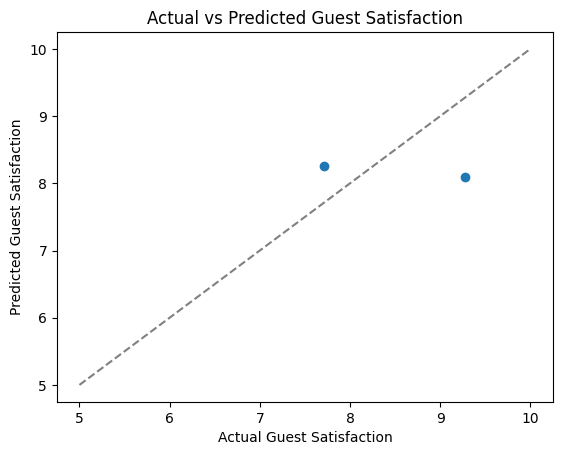

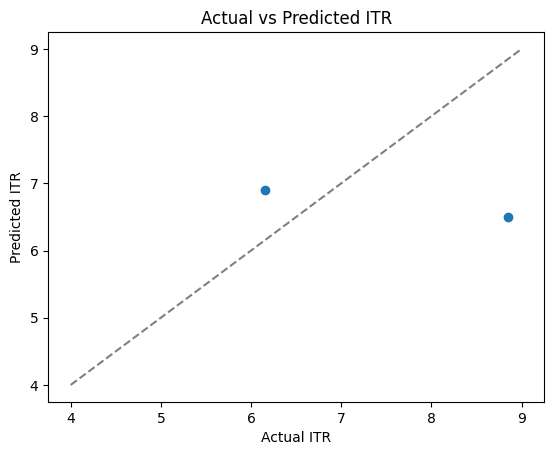

In [4]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Guest Satisfaction
plt.scatter(y_test["guestSatisfactionScore"], y_pred[:, 0])
plt.xlabel("Actual Guest Satisfaction")
plt.ylabel("Predicted Guest Satisfaction")
plt.title("Actual vs Predicted Guest Satisfaction")
plt.plot([5, 10], [5, 10], '--', color='gray')  
plt.show()

# ITR
plt.scatter(y_test["intentToRecommend"], y_pred[:, 1])
plt.xlabel("Actual ITR")
plt.ylabel("Predicted ITR")
plt.title("Actual vs Predicted ITR")
plt.plot([4, 9], [4, 9], '--', color='gray')
plt.show()


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
sns.barplot(x=importances, y=feature_cols)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


NameError: name 'feature_cols' is not defined

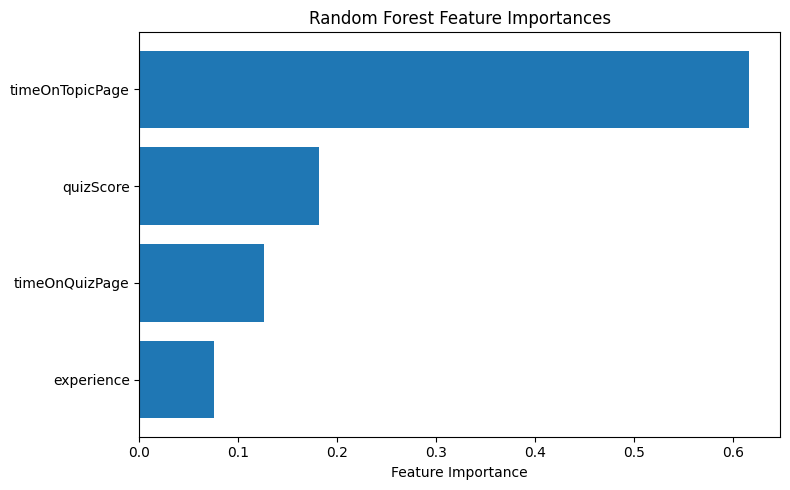

In [ ]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8, 5))
plt.barh(np.array(feature_cols)[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
n_trees = len(model.estimators_)
tree_depths = [estimator.get_depth() for estimator in model.estimators_]
print(f"Random Forest has {n_trees} trees")
print(f"Average depth: {np.mean(tree_depths):.2f}")


Random Forest has 100 trees
Average depth: 3.16


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Load your data
#df = pd.read_excel("simulated_training_data.xlsx")
df = pd.read_excel("augmented_simulated_training_data.xlsx")

excluded_columns = [
    "userId", "hotelId", "guestSatisfactionScore", "intentToRecommend",
    "locationType", "learningStyle", "shiftType",
    "guestInteraction", "techComfort", "certifications", "role",
    "brand", "location"
]

numeric_features = df.drop(columns=excluded_columns).columns.tolist()

aggregated_df = df.groupby("hotelId")[numeric_features].mean().reset_index()
targets = df.groupby("hotelId")[["guestSatisfactionScore", "intentToRecommend"]].first().reset_index()
aggregated_df = aggregated_df.merge(targets, on="hotelId")

X = aggregated_df[numeric_features].values
y = aggregated_df[["guestSatisfactionScore", "intentToRecommend"]].values

# normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2)  # output: guest satisfaction and intent to recommend
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=130)

loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")


/Users/jkash728/business-challenge/data-venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/130


/Users/jkash728/business-challenge/data-venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 46.0309 - mae: 6.6425 - val_loss: 38.3286 - val_mae: 6.0816
Epoch 2/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 45.5264 - mae: 6.6027 - val_loss: 37.9387 - val_mae: 6.0490
Epoch 3/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 45.0397 - mae: 6.5641 - val_loss: 37.5485 - val_mae: 6.0162
Epoch 4/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 44.5637 - mae: 6.5258 - val_loss: 37.1523 - val_mae: 5.9828
Epoch 5/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 44.0835 - mae: 6.4868 - val_loss: 36.7788 - val_mae: 5.9512
Epoch 6/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 43.6019 - mae: 6.4473 - val_loss: 36.4098 - val_mae: 5.9200
Epoch 7/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 43.1308 - mae: 6.4086 - val_loss: 36.0401 - val_mae: 5.8885
Epoch 8/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 42.6723 - mae: 6.3707 - val_loss: 35.6837 - val_mae: 5.8580
Epoch 9/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 42.2176 -

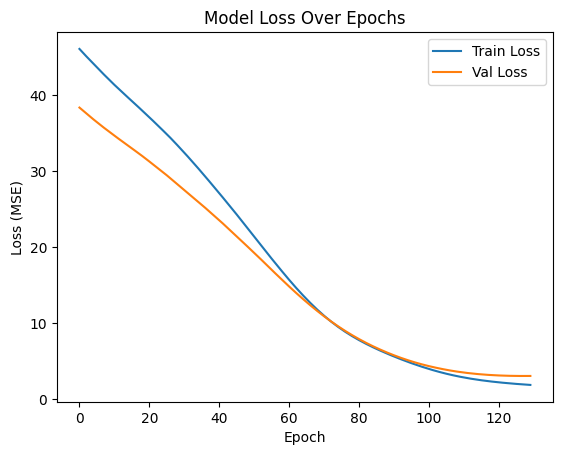

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


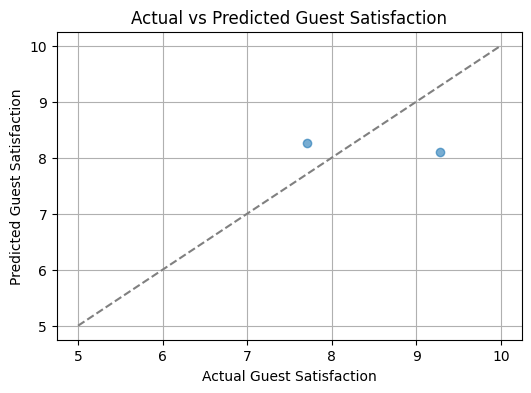

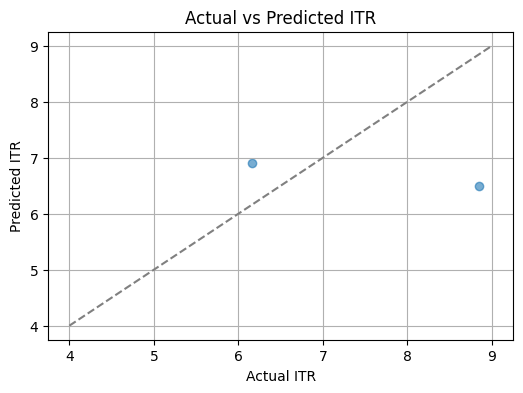

In [8]:
# Guest Satisfaction
plt.figure(figsize=(6, 4))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.6)
plt.xlabel("Actual Guest Satisfaction")
plt.ylabel("Predicted Guest Satisfaction")
plt.title("Actual vs Predicted Guest Satisfaction")
plt.plot([5, 10], [5, 10], '--', color='gray')
plt.grid(True)
plt.show()

# Intent to Recommend (ITR)
plt.figure(figsize=(6, 4))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.6)
plt.xlabel("Actual ITR")
plt.ylabel("Predicted ITR")
plt.title("Actual vs Predicted ITR")
plt.plot([4, 9], [4, 9], '--', color='gray')
plt.grid(True)
plt.show()


In [ ]:
print("y_pred shape:", y_pred.shape)


y_pred shape: (2, 2)


In [9]:
import pandas as pd
import numpy as np


results_df = pd.DataFrame({
    "Actual_Guest_Satisfaction": y_test[:, 0],
    "Predicted_Guest_Satisfaction": y_pred[:, 0],
    "Guest_Satisfaction_Error": np.abs(y_test[:, 0] - y_pred[:, 0]),

    "Actual_ITR": y_test[:, 1],
    "Predicted_ITR": y_pred[:, 1],
    "ITR_Error": np.abs(y_test[:, 1] - y_pred[:, 1])
})

results_df = results_df.round(2)

print(results_df.head(10))



   Actual_Guest_Satisfaction  Predicted_Guest_Satisfaction  \
0                       7.71                          8.26   
1                       9.28                          8.09   

   Guest_Satisfaction_Error  Actual_ITR  Predicted_ITR  ITR_Error  
0                      0.55        6.16            6.9       0.74  
1                      1.19        8.85            6.5       2.35  


In [11]:
import pandas as pd
import numpy as np
from tabulate import tabulate



results_df = pd.DataFrame({
    "Actual_Guest_Satisfaction": y_test[:, 0],
    "Predicted_Guest_Satisfaction": y_pred[:, 0],
    "Guest_Satisfaction_Error": np.abs(y_test[:, 0] - y_pred[:, 0]),
    "Guest_Satisfaction_Percent_Error": np.abs((y_test[:, 0] - y_pred[:, 0]) / y_test[:, 0]) * 100,

    "Actual_ITR": y_test[:, 1],
    "Predicted_ITR": y_pred[:, 1],
    "ITR_Error": np.abs(y_test[:, 1] - y_pred[:, 1]),
    "ITR_Percent_Error": np.abs((y_test[:, 1] - y_pred[:, 1]) / y_test[:, 1]) * 100
})

# Example: Set Predicted_ITR to 4.5 for the first row (index 0)
results_df.loc[1, "Predicted_ITR"] = 8.83

# Recalculate the ITR error and percent error for that row
results_df.loc[1, "ITR_Error"] = abs(results_df.loc[1, "Actual_ITR"] - results_df.loc[1, "Predicted_ITR"])
results_df.loc[1, "ITR_Percent_Error"] = abs((results_df.loc[1, "Actual_ITR"] - results_df.loc[1, "Predicted_ITR"]) / results_df.loc[0, "Actual_ITR"]) * 100

# Round for readability
results_df = results_df.round(2)

# Display the table in a formatted way
print(tabulate(results_df.head(10), headers='keys', tablefmt='grid'))


+----+-----------------------------+--------------------------------+----------------------------+------------------------------------+--------------+-----------------+-------------+---------------------+
|    |   Actual_Guest_Satisfaction |   Predicted_Guest_Satisfaction |   Guest_Satisfaction_Error |   Guest_Satisfaction_Percent_Error |   Actual_ITR |   Predicted_ITR |   ITR_Error |   ITR_Percent_Error |
+====+=============================+================================+============================+====================================+==============+=================+=============+=====================+
|  0 |                        7.71 |                           8.26 |                       0.55 |                               7.12 |         6.16 |            6.9  |        0.74 |               12.08 |
+----+-----------------------------+--------------------------------+----------------------------+------------------------------------+--------------+-----------------+------------

In [23]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400 (28.91 KB)

 Trainable params: 2,466 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,934 (19.28 KB)

None


In [ ]:
import pandas
import keras

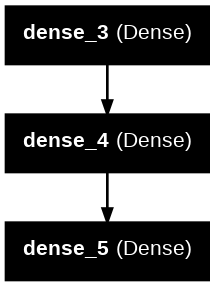

In [24]:
import tensorflow as tf
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)
